In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [11]:
#!wget 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv' -O credit-scoring.csv

In [12]:
df = pd.read_csv('credit-scoring.csv')

In [13]:
df.head(2).T

,0,1
Status,1,1
Seniority,9,17
Home,1,1
Time,60,60
Age,30,58
Marital,2,3
Records,1,1
Job,3,1
Expenses,73,48
Income,129,131


In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.head(1)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846


In [16]:
# decode to strings

status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [17]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [18]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [19]:
# 3 columns with missing values
df.income.max()
df.assets.max()
df.debt.max()

99999999

In [20]:
# similar as map only for one number
df.income.replace(to_replace=99999999, value=np.nan).max()

959.0

In [21]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [22]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [23]:
df.status.value_counts()
# not clear what to do with unknown

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [24]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=11)

In [27]:
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [28]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
y_full_train = (df_full_train.status == 'default').astype('int').values

In [29]:
# drop column status
del df_train['status']
del df_val['status']
del df_test['status']
del df_full_train['status']

# Decision trees
- How a decision tree looks like?
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [30]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [31]:
xi = df_train.iloc[0].to_dict()
assess_risk(xi)

'ok'

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [33]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [34]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [35]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [36]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [37]:
y_pred = dt.predict_proba(X_train)[:,1] # simply mermorized data
 # overfitted
print('train:', roc_auc_score(y_train, y_pred))
y_pred = dt.predict_proba(X_val)[:,1]
print('val:', roc_auc_score(y_val, y_pred))

train: 0.8427250577432257
val: 0.7618094742195636


In [38]:
from sklearn.tree import export_text
#print(export_text(dt, feature_names=dv.get_feature_names()))

# Decision tree learning alghorithm
- Finding the best split for one column
- Finding thebest split for the entire dataset
- Stopping criteria
- Decision tree learning alghorith

In [39]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]
df_example = pd.DataFrame(data, columns=['assets', 'status'])

In [40]:
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [41]:
# split into two parts by assets
# ASSETS > T
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [42]:
from IPython.display import display

In [43]:
Ts = [2000, 3000, 4000, 5000, 8000] # potentials tresholds
# for each we want to split into datasets
# we can see what split is the best one
# we have diffrent evaluation criteria
# MISSCLAFICATION RATE/IMPURITY
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))



2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


# Decision trees parameter tuning
- selecting max_depth
- selection min_sample_leaf - mininam size of a group

In [44]:
for d in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]:

    
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s - > %.3f' % (d, auc))

   1 - > 0.606
   2 - > 0.669
   3 - > 0.739
   4 - > 0.761
   5 - > 0.767
   6 - > 0.754
   7 - > 0.738
   8 - > 0.731
   9 - > 0.708
  10 - > 0.682
  15 - > 0.665
  20 - > 0.647
None - > 0.657


In [45]:
scores = []

for d in range(7,11):
    for s in range(1,20):
    
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print('(%4s, %3s) - > %.3f' % (d, s, auc))
        scores.append((d, s, auc))

(   7,   1) - > 0.742
(   7,   2) - > 0.762
(   7,   3) - > 0.750
(   7,   4) - > 0.757
(   7,   5) - > 0.757
(   7,   6) - > 0.755
(   7,   7) - > 0.752
(   7,   8) - > 0.755
(   7,   9) - > 0.764
(   7,  10) - > 0.763
(   7,  11) - > 0.768
(   7,  12) - > 0.772
(   7,  13) - > 0.775
(   7,  14) - > 0.776
(   7,  15) - > 0.780
(   7,  16) - > 0.781
(   7,  17) - > 0.769
(   7,  18) - > 0.777
(   7,  19) - > 0.778
(   8,   1) - > 0.749
(   8,   2) - > 0.755
(   8,   3) - > 0.742
(   8,   4) - > 0.751
(   8,   5) - > 0.746
(   8,   6) - > 0.746
(   8,   7) - > 0.743
(   8,   8) - > 0.753
(   8,   9) - > 0.760
(   8,  10) - > 0.761
(   8,  11) - > 0.760
(   8,  12) - > 0.764
(   8,  13) - > 0.772
(   8,  14) - > 0.773
(   8,  15) - > 0.780
(   8,  16) - > 0.787
(   8,  17) - > 0.774
(   8,  18) - > 0.779
(   8,  19) - > 0.778
(   9,   1) - > 0.701
(   9,   2) - > 0.725
(   9,   3) - > 0.730
(   9,   4) - > 0.742
(   9,   5) - > 0.738
(   9,   6) - > 0.735
(   9,   7) - > 0.738
(   9,   8

In [46]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])

In [47]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
72,10,16,0.792597
53,9,16,0.789503
71,10,15,0.789203
52,9,15,0.787578
73,10,17,0.787293
...,...,...,...
39,9,2,0.724998
60,10,4,0.718710
58,10,2,0.708638
38,9,1,0.701376


In [48]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values = 'auc')

In [51]:
df_scores_pivot.round(3)

max_depth,7,8,9,10
min_samples_leaf,,,,
1,0.742,0.749,0.701,0.696
2,0.762,0.755,0.725,0.709
3,0.750,0.742,0.730,0.733
4,0.757,0.751,0.742,0.719
5,0.757,0.746,0.738,0.725
6,0.755,0.746,0.735,0.725
7,0.752,0.743,0.738,0.744
8,0.755,0.753,0.755,0.758
9,0.764,0.760,0.764,0.756


<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>

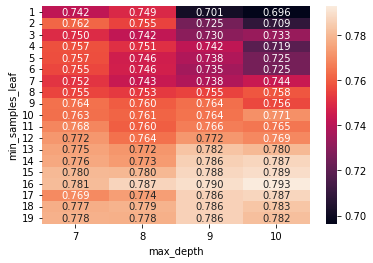

In [52]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt ='.3f')

In [53]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=16)

# Ensembles and random forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

each model gets random subset of features

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [56]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [57]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [58]:
scores = []
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val,ay_pred)
    scores.append((n, auc))

NameError: name 'ay_pred' is not defined

In [59]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])

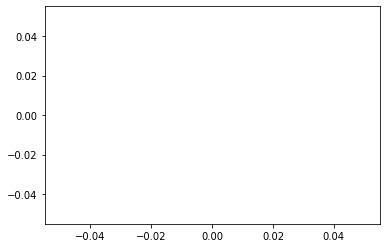

In [60]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [61]:
scores = []
for d in [5, 10 ,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_jobs=-1, n_estimators=n,max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d, n, auc))

In [62]:
df_scores = pd.DataFrame(scores, columns = ['max_depth','n_estimators', 'auc'])

In [63]:
df_scores.head(1)

,max_depth,n_estimators,auc
0,5,10,0.787699


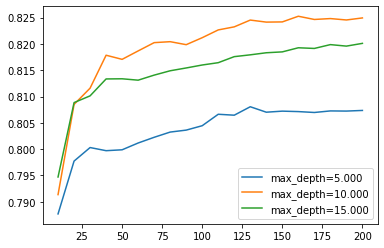

In [64]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc,label = 'max_depth=%.3f' % d )

plt.legend()

In [65]:
max_depth = 10

In [66]:
scores = []
for s in [1, 3 , 5, 10, 50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_jobs=-1,
                                    n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((s, n, auc))

In [67]:
df_scores = pd.DataFrame(scores, columns = ['min_sample_leaf','n_estimators', 'auc'])

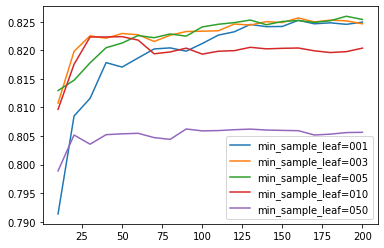

In [68]:
for s in [1, 3 , 5, 10, 50]:
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,label = 'min_sample_leaf=%.3d' % s)

plt.legend()

In [69]:
min_sample_leaf = 3
n_estimators = 125

In [70]:
rf = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    min_samples_leaf=min_sample_leaf,
                                    random_state=1,
                                    n_jobs = -1,
                                     )
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val,y_pred)
print(auc)

0.8242564965731032


# Gradient boosting and XGBoost
- Gradient boostring vs random forest
- Installing XGBoost
- Training the first model
- Prefromance monitoring
- Parsing xgboost's monitoring output

RandomForest - multiple independent decision trees <br>
Boosting is diffrent way to combine models
(we traing model, and then train on mistkaes) and then we combine on model, each next model trys to correct mistakes of prediction of previous model
If as model we take tree, then we get gradient boostring trees. XGBoost is good for it

In [1]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [75]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [101]:
xgb_params = {
    'eta' : 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread':8,
    'eval_metric': 'auc',
    'seed':1,
    'verbosity': 1 # show only warnings
    
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [102]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8152745150274878

In [107]:
%%capture output
watchlist = [(dtrain,'train'), (dval, 'val')]
xgb_params = {
    'eta' : 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread':8,
    'eval_metric': 'auc',


    'seed':1,
    'verbosity': 1 # show only warnings
    
}
model = xgb.train(xgb_params,
                  dtrain, num_boost_round=200, verbose_eval=10,
                 evals=watchlist)

In [111]:
s = output.stdout

In [115]:
lines = s.split('\n')

In [118]:
num_iter, train_auc, val_auc = lines[0].split('\t')

In [121]:
int(num_iter.strip('[]'))

0

In [124]:
float(train_auc.strip('train-auc:'))

0.863

In [128]:
float(val_auc.strip('val-auc:'))

0.76818

In [139]:
def parse_xgb_output(output):
    auc_scores = []
    for line in output.stdout.split('\n'):
        if (line.count('\t') == 2):
            num_iter, train_auc, val_auc = line.split('\t')
            auc_scores.append((int(num_iter.strip('[]')), 
                              float(train_auc.strip('train-auc:')),
                              float(val_auc.strip('val-auc:'))))
    columns = ['num_iter', 'train_auc', 'val_auc']
    return pd.DataFrame(auc_scores, columns = columns)

In [140]:
parse_xgb_output(output)

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,10,0.95002,0.81558
2,20,0.97316,0.81775
3,30,0.98772,0.81788
4,40,0.99456,0.81387
5,50,0.99688,0.81128
6,60,0.99889,0.80801
7,70,0.99944,0.80732
8,80,0.99985,0.80677
9,90,0.99991,0.80637


In [188]:
scores = {}

In [201]:
%%capture output
watchlist = [(dtrain,'train'), (dval, 'val')]
xgb_params = {
    'eta' : 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread':8,
    'eval_metric': 'auc',


    'seed':1,
    'verbosity': 1 # show only warnings
    
}
model = xgb.train(xgb_params,
                  dtrain, num_boost_round=175, verbose_eval=10,
                 evals=watchlist)

In [195]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
#key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [196]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

(0.82, 0.84)

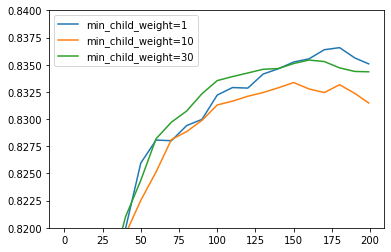

In [199]:
for key, df_score  in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = key)
plt.legend()
plt.ylim(0.82, 0.84)


In [202]:
xgb_params = {
    'eta' : 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread':8,
    'eval_metric': 'auc',


    'seed':1,
    'verbosity': 1 # show only warnings
    
}
model = xgb.train(xgb_params,
                  dtrain, num_boost_round=175)